In [1]:
from PIL import Image
import glob
import os
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path1 = os.path.realpath("C:/Users/lenovo/Desktop/AiffelNode/Project/rock_scissors_paper_train/rock")
resize_images(image_dir_path1)
image_dir_path2 = os.path.realpath("C:/Users/lenovo/Desktop/AiffelNode/Project/rock_scissors_paper_train/scissors")
resize_images(image_dir_path2)
image_dir_path3 = os.path.realpath("C:/Users/lenovo/Desktop/AiffelNode/Project/rock_scissors_paper_train/paper")
resize_images(image_dir_path3)


image_dir_path4 = os.path.realpath("C:/Users/lenovo/Desktop/AiffelNode/Project/rock_scissors_paper_test/rock")
resize_images(image_dir_path4)
image_dir_path5 = os.path.realpath("C:/Users/lenovo/Desktop/AiffelNode/Project/rock_scissors_paper_test/scissors")
resize_images(image_dir_path5)
image_dir_path6 = os.path.realpath("C:/Users/lenovo/Desktop/AiffelNode/Project/rock_scissors_paper_test/paper")
resize_images(image_dir_path6)

"""
image_dir_path7 = os.path.realpath("C:/Users/lenovo/Desktop/AiffelNode/Project/rock_scissors_paper_val/rock")
resize_images(image_dir_path7)
image_dir_path8 = os.path.realpath("C:/Users/lenovo/Desktop/AiffelNode/Project/rock_scissors_paper_val/scissors")
resize_images(image_dir_path8)
image_dir_path9 = os.path.realpath("C:/Users/lenovo/Desktop/AiffelNode/Project/rock_scissors_paper_val/paper")
resize_images(image_dir_path9)
"""



3202  images to be resized.


c:\Users\lenovo\Anaconda3\envs\condanote\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  # Remove the CWD from sys.path while we load stuff.


3202  images resized.
2874  images to be resized.
2874  images resized.
2802  images to be resized.
2802  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


'\nimage_dir_path7 = os.path.realpath("C:/Users/lenovo/Desktop/AiffelNode/Project/rock_scissors_paper_val/rock")\nresize_images(image_dir_path7)\nimage_dir_path8 = os.path.realpath("C:/Users/lenovo/Desktop/AiffelNode/Project/rock_scissors_paper_val/scissors")\nresize_images(image_dir_path8)\nimage_dir_path9 = os.path.realpath("C:/Users/lenovo/Desktop/AiffelNode/Project/rock_scissors_paper_val/paper")\nresize_images(image_dir_path9)\n'

In [3]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    #print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


def load_data11(img_path, number_of_data=150):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    #print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels



image_dir_path11 = os.path.realpath("C:/Users/lenovo/Desktop/AiffelNode/Project/rock_scissors_paper_train")
(x_train, y_train)=load_data(image_dir_path11, number_of_data=8878)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

image_dir_path22 = os.path.realpath("C:/Users/lenovo/Desktop/AiffelNode/Project/rock_scissors_paper_test")
(x_test, y_test)=load_data(image_dir_path22)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

image_dir_path33 = os.path.realpath("C:/Users/lenovo/Desktop/AiffelNode/Project/rock_scissors_paper_val")
(x_val, y_val)=load_data11(image_dir_path33, number_of_data=150)
x_val_norm = x_val/255.0   # 입력은 0~1 사이의 값으로 정규화


print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

print("x_val shape: {}".format(x_val.shape))
print("y_val shape: {}".format(y_val.shape))


x_train shape: (8878, 28, 28, 3)
y_train shape: (8878,)
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
x_val shape: (150, 28, 28, 3)
y_val shape: (150,)


In [4]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  9


In [5]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape(-1,28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape(-1,28, 28,3)
x_val_reshaped=x_val_norm.reshape(-1,28, 28,3)
print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (8878, 28, 28, 3)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (8878, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


In [6]:
callbacks=[keras.callbacks.ModelCheckpoint(filepath='feature_extraction.keras',
                                           monitor="val_loss")
           ]

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

hist= model.fit(x_train_reshaped, y_train, epochs=20,validation_data=(x_val_reshaped,y_val),callbacks=callbacks)


Epoch 1/20
278/278 [==============================] - 5s 5ms/step - loss: 0.9750 - accuracy: 0.5061 - val_loss: 0.8356 - val_accuracy: 0.8067
Epoch 2/20
278/278 [==============================] - 1s 4ms/step - loss: 0.6184 - accuracy: 0.7458 - val_loss: 0.4896 - val_accuracy: 0.8600
Epoch 3/20
278/278 [==============================] - 1s 4ms/step - loss: 0.4154 - accuracy: 0.8435 - val_loss: 0.3205 - val_accuracy: 0.9600
Epoch 4/20
278/278 [==============================] - 1s 4ms/step - loss: 0.3297 - accuracy: 0.8802 - val_loss: 0.3227 - val_accuracy: 0.8867
Epoch 5/20
278/278 [==============================] - 1s 4ms/step - loss: 0.2732 - accuracy: 0.8989 - val_loss: 0.3246 - val_accuracy: 0.9533
Epoch 6/20
278/278 [==============================] - 1s 4ms/step - loss: 0.2230 - accuracy: 0.9190 - val_loss: 0.2812 - val_accuracy: 0.9600
Epoch 7/20
278/278 [==============================] - 1s 4ms/step - loss: 0.1964 - accuracy: 0.9248 - val_loss: 0.2637 - val_accuracy: 0.9600
Epoch 

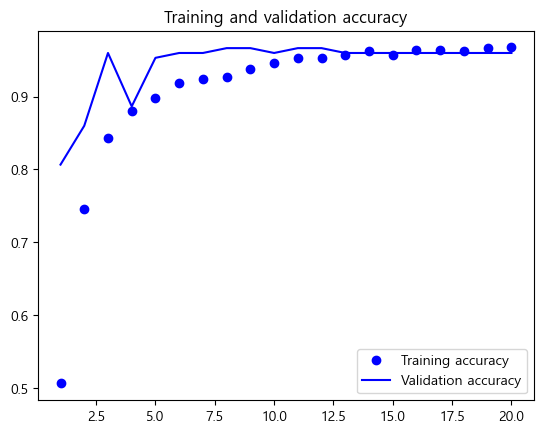

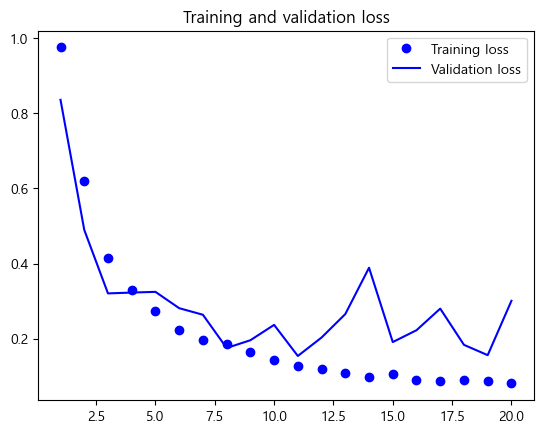

In [7]:
import matplotlib.pyplot as plt
accuracy = hist.history["accuracy"]
val_accuracy = hist.history["val_accuracy"]
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [8]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 0.7502 - accuracy: 0.6900 - 68ms/epoch - 7ms/step
test_loss: 0.7501950263977051
test_accuracy: 0.6899999976158142
